In [86]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [87]:
#Use the attached audio data file.
#Load the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.decomposition import PCA
df=pd.read_csv('../data/train_data.zip',compression='zip')
df=df.fillna(0)

In [88]:
import seaborn as sns
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel5751,pixel5752,pixel5753,pixel5754,pixel5755,pixel5756,pixel5757,pixel5758,pixel5759,pixel5760
count,498.000000,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,...,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,498.000000,498.0
mean,0.771084,4.550947e-04,1.012209e-03,2.023358e-03,2.801039e-03,3.967676e-03,4.088747e-03,4.231594e-03,3.563347e-03,3.497138e-03,...,7.606265e-07,7.523284e-07,7.122032e-07,6.978583e-07,7.091612e-07,6.540906e-07,7.256252e-07,7.876270e-07,0.000145,0.0
std,0.420557,3.969101e-03,5.752964e-03,1.266470e-02,1.768508e-02,2.625095e-02,2.192172e-02,2.146066e-02,1.776168e-02,1.665157e-02,...,2.248290e-06,2.031299e-06,1.982734e-06,1.850756e-06,2.071805e-06,1.689767e-06,2.203251e-06,1.832810e-06,0.000507,0.0
min,0.000000,0.000000e+00,0.000000e+00,1.464108e-16,9.305325e-11,1.686819e-10,5.111137e-10,2.381365e-09,8.326484e-08,8.432650e-08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,2.099259e-07,1.619865e-07,1.826671e-07,3.162441e-07,4.498702e-07,7.523503e-07,8.646179e-07,8.724283e-07,1.148021e-06,...,3.984256e-08,4.229937e-08,3.996079e-08,3.614093e-08,3.816058e-08,3.372291e-08,3.725384e-08,5.633666e-08,0.000001,0.0
50%,1.000000,4.441994e-07,5.464149e-07,6.423447e-07,8.091217e-07,1.087191e-06,1.886654e-06,2.308385e-06,2.447852e-06,3.131247e-06,...,1.599216e-07,1.518522e-07,1.463107e-07,1.395661e-07,1.366467e-07,1.297761e-07,1.325580e-07,1.979556e-07,0.000008,0.0
75%,1.000000,2.751659e-06,1.179958e-05,2.962908e-05,5.345103e-05,8.859461e-05,1.132882e-04,1.307337e-04,1.108134e-04,1.011311e-04,...,4.797698e-07,4.893144e-07,4.134273e-07,4.701599e-07,4.192325e-07,3.989794e-07,4.007739e-07,6.078004e-07,0.000059,0.0
max,1.000000,5.799263e-02,6.504698e-02,1.566792e-01,2.645070e-01,3.892635e-01,3.615926e-01,3.397614e-01,2.604496e-01,2.059865e-01,...,2.470363e-05,2.089157e-05,1.858421e-05,1.852425e-05,2.732086e-05,1.410118e-05,2.220329e-05,1.816809e-05,0.007819,0.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 5762 entries, label to pixel5760
dtypes: float64(5762)
memory usage: 21.9 MB


In [89]:
df.shape

(498, 5762)

In [90]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel5751', 'pixel5752', 'pixel5753', 'pixel5754', 'pixel5755',
       'pixel5756', 'pixel5757', 'pixel5758', 'pixel5759', 'pixel5760'],
      dtype='object', length=5762)

c:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

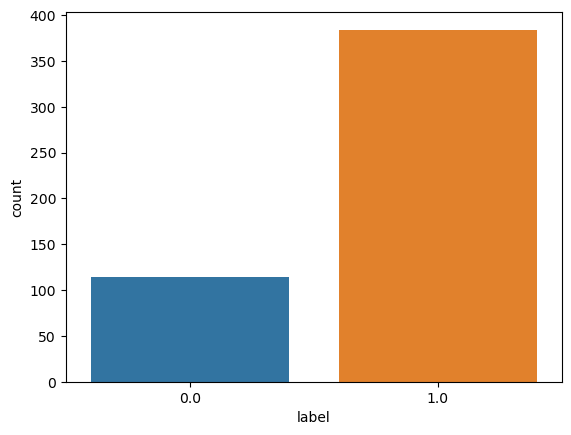

In [91]:
sns.countplot(df['label'], label = 'Count')

<AxesSubplot:xlabel='pixel0', ylabel='pixel1'>

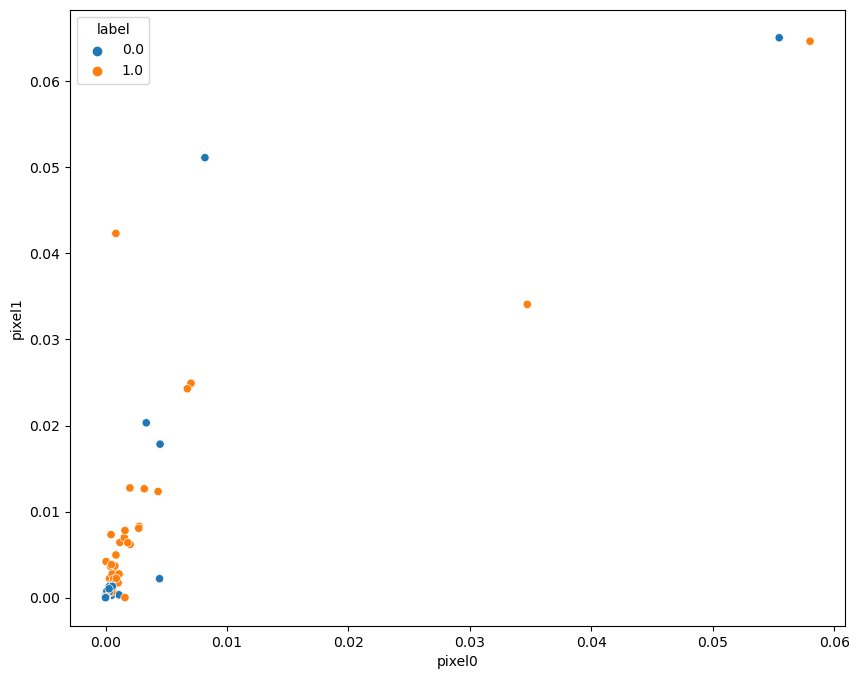

In [92]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='pixel0', y='pixel1', hue='label', data=df)

In [93]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
target  = 'label'
X = df.drop(target, axis=1)
y = df[target].values.astype(int)


In [94]:
print(f" 'X' shape: {X.shape}")
print(f" 'y' shape: {y.shape}")

 'X' shape: (498, 5761)
 'y' shape: (498,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [101]:
#Scale the data
#Run the features through PCA
#We create a PCA object, use the fit method to discover the principle components, 
#and then use transform to rotate and reduce the dimensionality.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaler = StandardScaler()
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

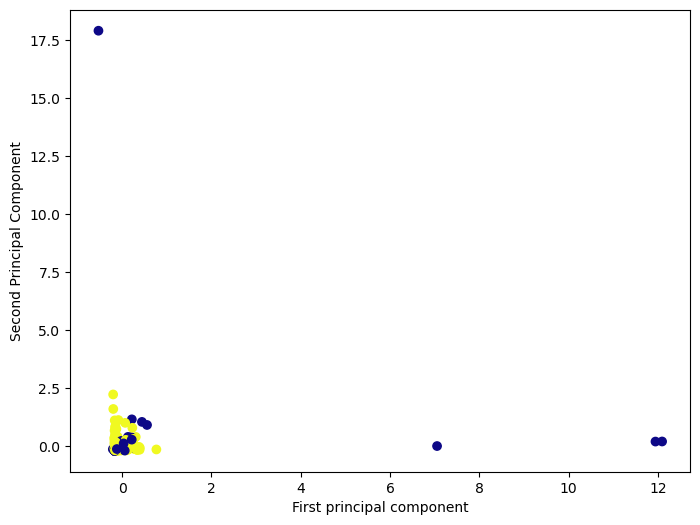

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
#Why might PCA be helpful in this dataset?
#as there are around 5762 components in this dataset, which will create mess of calculations for loading data into the memory, 
# we need to use the power of PCA to reduce the principle components 
# in this step above I have used two PCs only and produce the results in the lower cell


In [103]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)
#Described the results


Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Train Result:n================================================
Accuracy Score: 79.89%
_______________________________________________
CLASSIFICATION REPORT:n                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.794721  0.798851    0.897361      0.840142
recall      0.090909    1.000000  0.798851    0.545455      0.798851
f1-score    0.166667    0.885621  0.798851    0.526144      0.726542
support    77.000000  271.000000  0.798851  348.000000    348.000000
_______________________________________________
Confusion Matrix: n [[  7  70]
 [  0 271]]n
Test Result:n================================================
Accuracy Score: 76.67%
_______________________________________________
CLASSIFICATION REPORT:n                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.763514  0.766667    0.881757      0.821

In [105]:
#What is a drawback of PCA here?
#The only drawback of the PCA, i see is that dimentionality reduction is powerful but at the cost of components which are difficult to understand
#Review the accuracy, try different numbers of PCs
#PCs = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)
#Described the results
#as increased the PCs from 2 to 3 the training plus the test accuracy increased a bit which is cool



Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Train Result:n================================================
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:n                   0           1  accuracy   macro avg  weighted avg
precision   0.875000    0.810241  0.813218    0.842620      0.824570
recall      0.181818    0.992620  0.813218    0.587219      0.813218
f1-score    0.301075    0.892206  0.813218    0.596640      0.761410
support    77.000000  271.000000  0.813218  348.000000    348.000000
_______________________________________________
Confusion Matrix: n [[ 14  63]
 [  2 269]]n
Test Result:n================================================
Accuracy Score: 77.33%
_______________________________________________
CLASSIFICATION REPORT:n                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.768707  0.773333    0.884354      0.825

In [22]:
pickle.dump(model,open('model.sav','wb'))